### MOC time series

In [1]:
# mom6_tools
from mom6_tools.DiagsCase import DiagsCase
from mom6_tools.MOM6grid import MOM6grid
from mom6_tools.m6toolbox import genBasinMasks
from mom6_tools.m6plot import myStats, annotateStats

import xarray as xr
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
import warnings, os, yaml
warnings.filterwarnings("ignore")

Basemap module not found. Some regional plots may not function properly


In [2]:
diag_config_yml = yaml.load(open('diag_config_comparison.yml','r'),
                            Loader=yaml.Loader)

In [3]:
# initialize lists
dcase = []; casename=[]
label = []; outdir=[]
ncfiles=[]
ncases = len(diag_config_yml.keys()) - 1
if ncases < 2:
  # Create the case instance
  dcase = DiagsCase(diag_config_yml['Case'], xrformat=True)
  casename.append(dcase.casename)
  label.append(diag_config_yml['Case']['SNAME'])
  ncfiles.append(diag_config_yml['Case']['OCN_DIAG_ROOT'])
  DOUT_S = dcase.get_value('DOUT_S')
  if DOUT_S:
    outdir.append(dcase.get_value('DOUT_S_ROOT')+'/ocn/hist/')
  else:
    outdir.append(dcase.get_value('RUNDIR'))
else:
  for i in range(ncases):
    cname = 'Case{}'.format(i+1)
    dcase = DiagsCase(diag_config_yml[cname], xrformat=True)
    casename.append(dcase.casename)
    label.append(diag_config_yml[cname]['SNAME'])
    ncfiles.append(diag_config_yml[cname]['OCN_DIAG_ROOT'])
    DOUT_S = dcase.get_value('DOUT_S')
    if DOUT_S:
      outdir.append(dcase.get_value('DOUT_S_ROOT')+'/ocn/hist/')
    else:
      outdir.append(dcase.get_value('RUNDIR'))
    
# set avg dates
avg = diag_config_yml['Avg']
start_date = avg['start_date']
end_date = avg['end_date']

In [4]:
ncfiles

['/glade/u/home/gmarques/Notebooks/CESM_MOM6/B/b.cesm3_cam058_mom_e.B1850WscMOM.ne30_L58_t061.camdev_cice5.026c/ncfiles/',
 '/glade/u/home/gmarques/Notebooks/CESM_MOM6/B/b.cesm3_cam058_mom_e.B1850WscMOM.ne30_L58_t061.camdev_cice6.026e/ncfiles/',
 '/glade/u/home/gmarques/Notebooks/CESM_MOM6/B/b.cesm3_cam058_mom_e.B1850WscMOM.ne30_L58_t061.camdev_cice5.026f/ncfiles/',
 '/glade/u/home/gmarques/Notebooks/CESM_MOM6/B/b.cesm3_cam058_mom_e.B1850WscMOM.ne30_L58_t061.camdev_cice5.026g/ncfiles/',
 '/glade/u/home/gmarques/Notebooks/CESM_MOM6/B/b.cesm3_cam058_mom_e.B1850WscMOM.ne30_L58_t061.camdev_cice6.026h/ncfiles/']

In [5]:
# for plotting, the following was a feedback from Keith Lindsay.
linestyle = ['solid','solid','solid',
             'dashed','dashed','dashed',
             'dotted','dotted','dotted']
color = ['black','red','blue','black',
         'red','blue','black',
         'red','blue']

In [6]:
xr.__version__

'2022.9.0'

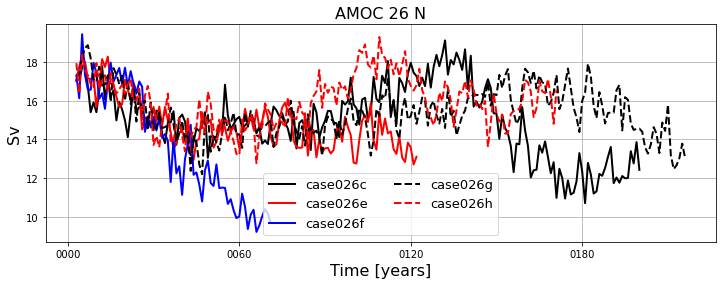

In [7]:
%matplotlib inline

fig = plt.figure(figsize=(12, 4))

for n in range(len(casename)):
  ds1 = xr.open_dataset(ncfiles[n]+casename[n]+'_MOC.nc')
  ds = ds1.sel(time=slice(start_date,end_date)).resample(time="1Y", closed='left').mean('time')
  plt.plot(ds.time, ds.amoc_26, label=label[n], lw=2, linestyle=linestyle[n],  
           color=color[n])

plt.title('AMOC 26 N', fontsize=16)
plt.xlabel('Time [years]', fontsize=16)
plt.ylabel('Sv', fontsize=16)
plt.grid()
plt.legend(fontsize=13, ncol=2);
#fname='PNG/moc_26N.png'
#plt.savefig(fname, dpi=150, bbox_inches='tight')

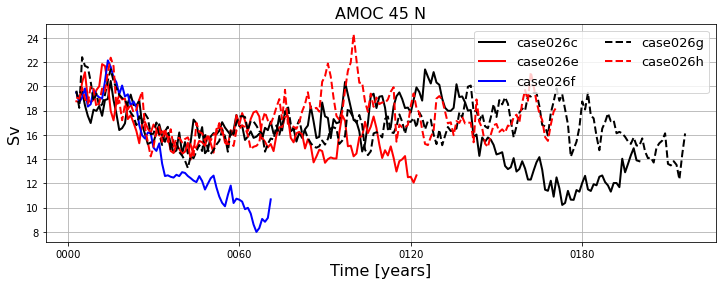

In [8]:
%matplotlib inline

fig = plt.figure(figsize=(12, 4))

for n in range(len(casename)):
  ds1 = xr.open_dataset(ncfiles[n]+casename[n]+'_MOC.nc')
  ds = ds1.sel(time=slice(start_date,end_date)).resample(time="1Y", closed='left').mean('time')
  plt.plot(ds.time, ds.amoc_45, label=label[n], lw=2, linestyle=linestyle[n],  
           color=color[n])

plt.title('AMOC 45 N', fontsize=16)
plt.xlabel('Time [years]', fontsize=16)
plt.ylabel('Sv', fontsize=16)
plt.grid()
plt.legend(fontsize=13, ncol=2);
#fname='PNG/moc_45N.png'
#plt.savefig(fname, dpi=150, bbox_inches='tight')